## Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Sin Signal

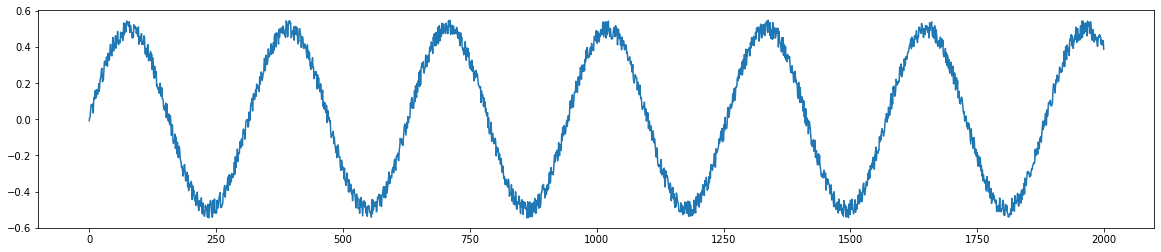

In [2]:
N = 2000
t = np.arange(0,N)
sin_data = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(sin_data)
plt.show()

## Convert Signal To Dataset

In [3]:
def convertSignalToDataset(signal,step):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(signal[j])
        
    X,Y = np.array(X), np.array(Y)
    return torch.Tensor(X[...,np.newaxis]), torch.Tensor(Y[...,np.newaxis])

In [4]:
X_train = sin_data[:1500]
X_test = sin_data[1500:]

In [5]:
X_train, Y_train = convertSignalToDataset(X_train,15)
X_test , Y_test = convertSignalToDataset(X_test,15)

## Model
## LSTM

In [6]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,num_classes):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        h_0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
        c_0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
        
        x,_ = self.lstm(x,(h_0,c_0))
        x = x[:,-1,:]
        x = self.fc(x)
        
        return x

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTM(input_size=1,hidden_size=64,num_layers=1,num_classes=1).to(device)

In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_function = nn.MSELoss()

In [9]:
for epoch in range(250):
    model.train()
    optimizer.zero_grad()
    predict = model(X_train)
    loss = loss_function(predict,Y_train)
    loss.backward()
    optimizer.step()
    print(f"Epochs: {epoch+1}, Loss: {loss}")

Epochs: 1, Loss: 0.1329648643732071
Epochs: 2, Loss: 0.1295013725757599
Epochs: 3, Loss: 0.12627394497394562
Epochs: 4, Loss: 0.12324920296669006
Epochs: 5, Loss: 0.12039005011320114
Epochs: 6, Loss: 0.11765303462743759
Epochs: 7, Loss: 0.1149887889623642
Epochs: 8, Loss: 0.1123460978269577
Epochs: 9, Loss: 0.10967613011598587
Epochs: 10, Loss: 0.10693530738353729
Epochs: 11, Loss: 0.10408656299114227
Epochs: 12, Loss: 0.10109880566596985
Epochs: 13, Loss: 0.09794497489929199
Epochs: 14, Loss: 0.09459991008043289
Epochs: 15, Loss: 0.09103856980800629
Epochs: 16, Loss: 0.08723492175340652
Epochs: 17, Loss: 0.08316074311733246
Epochs: 18, Loss: 0.07878423482179642
Epochs: 19, Loss: 0.07406790554523468
Epochs: 20, Loss: 0.06896604597568512
Epochs: 21, Loss: 0.06342320889234543
Epochs: 22, Loss: 0.05737733095884323
Epochs: 23, Loss: 0.050773851573467255
Epochs: 24, Loss: 0.04359395056962967
Epochs: 25, Loss: 0.035898685455322266
Epochs: 26, Loss: 0.02788936160504818
Epochs: 27, Loss: 0.019

Epochs: 208, Loss: 0.0021094162948429585
Epochs: 209, Loss: 0.0021010306663811207
Epochs: 210, Loss: 0.002092573558911681
Epochs: 211, Loss: 0.0020840431097894907
Epochs: 212, Loss: 0.0020754369907081127
Epochs: 213, Loss: 0.0020667542703449726
Epochs: 214, Loss: 0.00205799238756299
Epochs: 215, Loss: 0.0020491499453783035
Epochs: 216, Loss: 0.002040224615484476
Epochs: 217, Loss: 0.0020312145352363586
Epochs: 218, Loss: 0.0020221173763275146
Epochs: 219, Loss: 0.002012930577620864
Epochs: 220, Loss: 0.00200365181080997
Epochs: 221, Loss: 0.0019942782819271088
Epochs: 222, Loss: 0.0019848071970045567
Epochs: 223, Loss: 0.001975236227735877
Epochs: 224, Loss: 0.0019655623473227024
Epochs: 225, Loss: 0.0019557832274585962
Epochs: 226, Loss: 0.001945896539837122
Epochs: 227, Loss: 0.0019358992576599121
Epochs: 228, Loss: 0.0019257887033745646
Epochs: 229, Loss: 0.001915562548674643
Epochs: 230, Loss: 0.0019052173011004925
Epochs: 231, Loss: 0.001894750283099711
Epochs: 232, Loss: 0.001884

## Predict

In [10]:
model.eval()
pred_train = model(X_train)
pred_train = pred_train.data.numpy()
pred_test = model(X_test)
pred_test = pred_test.data.numpy()
nan_data = np.ones((1500,1)) * np.nan
pred_test = np.concatenate((nan_data,pred_test),axis=0)

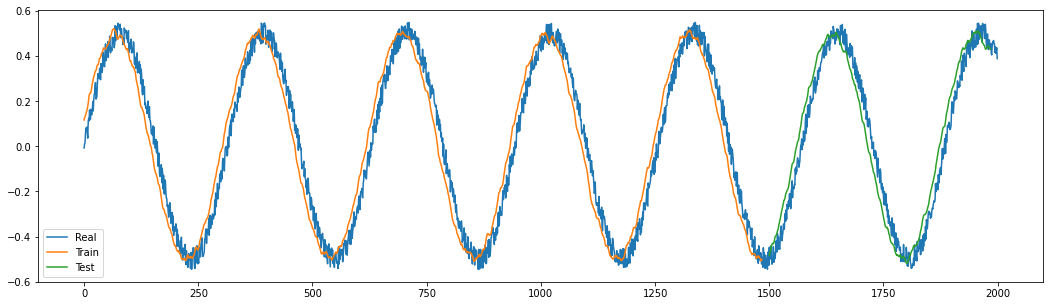

In [11]:
plt.figure(figsize=(18,5))
plt.plot(sin_data,label="Real")
plt.plot(pred_train,label="Train")
plt.plot(pred_test,label="Test")
plt.legend()
plt.show()